In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("speed_distance.csv")
df

,Time_Seconds,Distance_Meters
0,0.00000,2.993428
1,0.02004,1.783391
2,0.04008,3.414814
3,0.06012,5.224613
4,0.08016,1.768961
...,...,...
495,9.91984,-16.364271
496,9.93988,-19.655458
497,9.95992,-18.100919
498,9.97996,-19.611157


In [5]:
x=df[["Time_Seconds"]]
x
y=df["Distance_Meters"]



In [6]:
poly=PolynomialFeatures(degree=2)
poly_feature=poly.fit_transform(x)
poly_feature


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00400802e-02, 4.01604813e-04],
       [1.00000000e+00, 4.00801603e-02, 1.60641925e-03],
       ...,
       [1.00000000e+00, 9.95991984e+00, 9.92000032e+01],
       [1.00000000e+00, 9.97995992e+00, 9.95996000e+01],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02]], shape=(500, 3))

In [7]:
x_train,x_test,y_train,y_test=train_test_split(poly_feature,y,test_size=0.2,random_state=42)


In [8]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
y_pred=model.predict(x_test)
y_pred

array([ -2.36129696,   5.17166955,  -3.5216133 ,   6.56795562,
         6.03096061,  -5.44507192,  -3.79944091,   6.37151819,
         4.99534062, -11.72294614,   2.12309203,   6.2427936 ,
        -6.67964545,   5.52269813,  -3.24755906,  -4.85042532,
       -17.72043997,   3.31270344,   1.10804546,  -6.89127737,
       -17.01212554, -17.1529499 ,   3.27223502,  -1.93388824,
         5.27243577, -13.11059814, -18.00670058,   5.90148747,
         5.96541243,  -0.17781078, -14.95007159,  -0.32906894,
       -10.50546685,   6.49712141,   1.68546719,  -0.10281059,
        -6.99772223,   5.06712998,   5.94793007,   4.80853012,
        -4.4623795 ,   5.77216973, -16.31429267,   6.3744314 ,
         3.46755449,   5.30518598,   1.55665816,   2.24435434,
        -7.64519587,   2.88131978,   5.13724229,   6.41076394,
         6.45109306,  -7.10458635,   6.25909707,   4.4878317 ,
         6.55881681,   2.65556565,   6.05669947,   5.33751693,
       -17.57793856,   4.15056834,   0.62413185, -16.03

In [10]:
mse=mean_squared_error(y_pred,y_test)
mse
rmse=np.sqrt(mse)
rmse
score=r2_score(y_pred,y_test)
score

0.9307674503371388

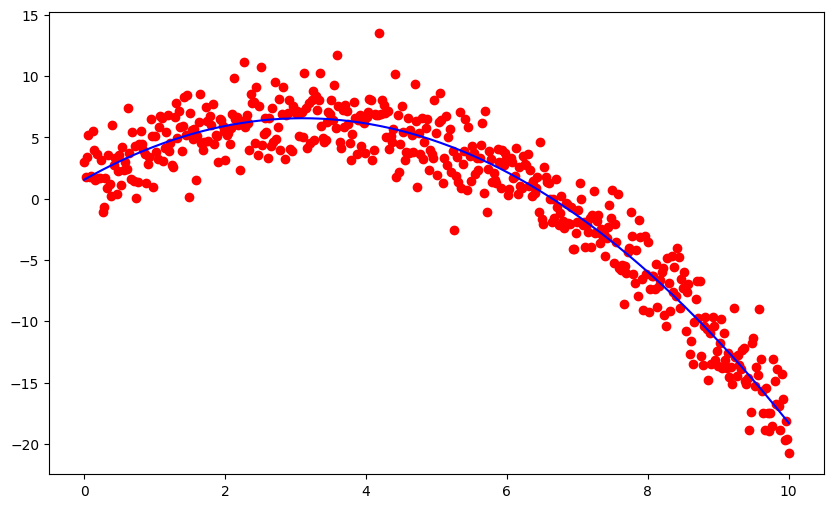

In [12]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.plot(x,model.predict(poly.transform(x)),color="blue")
plt.plot()
plt.show()

In [13]:
newdata=np.array([[1.202405]])
task=poly.fit_transform(newdata)
pre=model.predict(task)
pre

array([4.69141306])

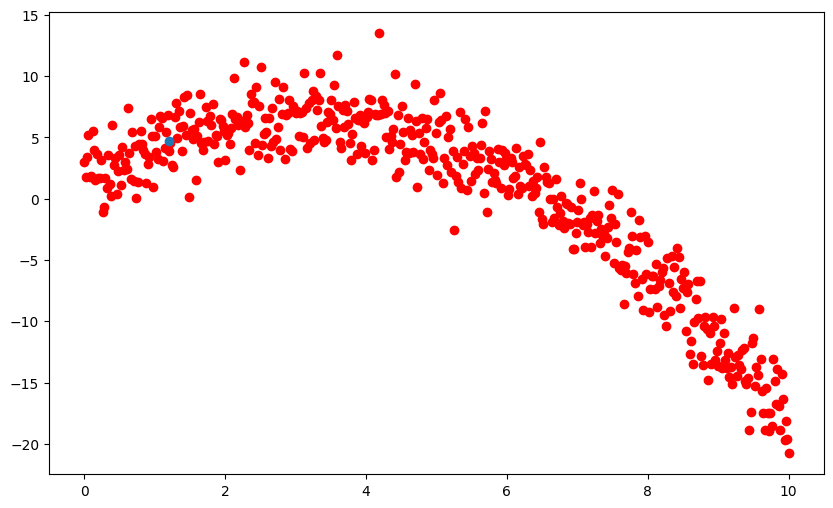

In [14]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(newdata,pre)
plt.show()
